<a href="https://colab.research.google.com/github/torchtorchkimtorch/Data_Practice/blob/main/20240313_%EA%B9%80%EB%AF%BC%ED%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data: https://dacon.io/competitions/official/236226/overview/description

# 목표: 웹 로그 기반 조회수 예측

## 목차
0. 기본 세팅
1. 데이터 전처리
2. 모델링
3. 제출

# 0. 기본 세팅

In [3]:
import pandas as pd
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
train = pd.read_csv("/content/drive/MyDrive/data_0313/train.csv")
test = pd.read_csv("/content/drive/MyDrive/data_0313/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/data_0313/sample_submission.csv")

sessionID : 세션 ID

userID : 사용자 ID

TARGET : 세션에서 발생한 총 조회수

browser : 사용된 브라우저

OS : 사용된 기기의 운영체제

device : 사용된 기기

new : 첫 방문 여부 (0: 첫 방문 아님, 1: 첫 방문)

quality : 세션의 질 (거래 성사를 기준으로 측정된 값, 범위: 1~100)

duration : 총 세션 시간 (단위: 초)

bounced : 이탈 여부 (0: 이탈하지 않음, 1: 이탈함)

transaction : 세션 내에서 발생의 거래의 수

transaction_revenue : 총 거래 수익

continent : 세션이 발생한 대륙

subcontinent : 세션이 발생한 하위 대륙

country : 세션이 발생한 국가

traffic_source : 트래픽이 발생한 소스

traffic_medium : 트래픽 소스의 매체

keyword : 트래픽 소스의 키워드, 일반적으로 traffic_medium이 organic, cpc인 경우에 설정

referral_path : traffic_medium이 referral인 경우 설정되는 경로

In [6]:
import pandas as pd
import numpy as np
import random
import os
from datetime import datetime

from sklearn.preprocessing import LabelEncoder

In [7]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

# 1. 전처리

## Basecode 데이터 전처리

In [6]:
# train 데이터셋에서 결측값 확인
train_missing_values = train.isnull().sum()
print("Train 데이터셋의 결측값:")
print(train_missing_values[train_missing_values > 0])

In [7]:
train['keyword'].fillna(train['keyword'].mode()[0], inplace=True)
train['referral_path'].fillna(train['referral_path'].mode()[0], inplace=True)

In [8]:
test['keyword'].fillna(train['keyword'].mode()[0], inplace=True) #train의 최빈값 사용
test['referral_path'].fillna(train['referral_path'].mode()[0], inplace=True)

In [9]:
categorical_features = list(train.dtypes[train.dtypes == "object"].index)

for i in categorical_features:
    count = train[i].nunique()  # 고유값의 개수를 계산
    print(f"{i}: {count}")

In [10]:
train = train.drop(columns=['sessionID','userID'],axis=1)
test = test.drop(columns=['sessionID','userID'],axis=1)

In [11]:
encoding_target = list(train.dtypes[train.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()
    le.fit(train[i])
    train[i] = le.transform(train[i])

    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    # test 데이터에 대해서 직접적으로 fit을 수행할 경우 Data Leakage
    for case in np.unique(test[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)

    test[i] = le.transform(test[i])

## 새로운 전처리

### 데이터 통으로 날려버리기


In [37]:
train = pd.read_csv("/content/drive/MyDrive/data_0313/train.csv")
test = pd.read_csv("/content/drive/MyDrive/data_0313/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/data_0313/sample_submission.csv")

In [41]:
train.drop(['keyword','referral_path','sessionID','userID'],axis=1,inplace=True)
test.drop(['keyword','referral_path','sessionID','userID'],axis=1,inplace=True)

In [42]:
encoding_target = list(train.dtypes[train.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()
    le.fit(train[i])
    train[i] = le.transform(train[i])

    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    # test 데이터에 대해서 직접적으로 fit을 수행할 경우 Data Leakage
    for case in np.unique(test[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)

    test[i] = le.transform(test[i])

### Null 을  "None"이라 부르기

In [108]:
train = pd.read_csv("/content/drive/MyDrive/data_0313/train.csv")
test = pd.read_csv("/content/drive/MyDrive/data_0313/test.csv")
submission = pd.read_csv("/content/drive/MyDrive/data_0313/sample_submission.csv")

In [109]:
train.drop(['sessionID','userID'],axis=1,inplace=True)
test.drop(['sessionID','userID'],axis=1,inplace=True)

In [110]:
train['keyword'].fillna("None",inplace=True)
train['referral_path'].fillna("None",inplace=True)
test['keyword'].fillna("None",inplace=True)
test['referral_path'].fillna("None",inplace=True)

In [113]:
encoding_target = list(train.dtypes[train.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()
    le.fit(train[i])
    train[i] = le.transform(train[i])

    # test 데이터의 새로운 카테고리에 대해 le.classes_ 배열에 추가
    # test 데이터에 대해서 직접적으로 fit을 수행할 경우 Data Leakage
    for case in np.unique(test[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)

    test[i] = le.transform(test[i])

In [128]:
corr_train=train.corr()

In [126]:
!pip install seaborn

<Axes: >

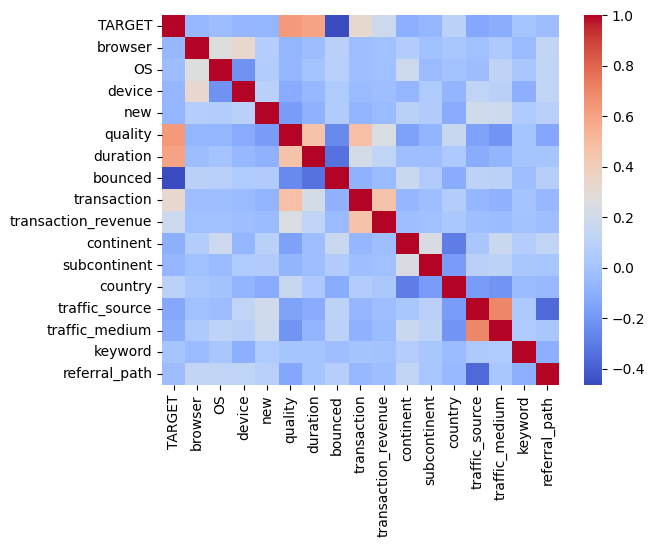

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_train,cmap='coolwarm')

In [131]:
plt.show()

### 분류 모델 결측치 보간



In [11]:
# train = train.drop(columns=['sessionID','userID'],axis=1)
# test = test.drop(columns=['sessionID','userID'],axis=1)

In [ ]:
# train.nunique()

In [13]:
# for_keyword_classify=train[train['keyword'].notnull()]

In [ ]:
# for_keyword_classify.drop(['referral_path'],axis=1,inplace=True)

In [ ]:
# !pip install catboost

In [ ]:
# for_keyword_classify

In [26]:
# encoding_target = list(X.dtypes[X.dtypes == "object"].index)

# for i in encoding_target:
    # le = LabelEncoder()
    # le.fit(X[i])
    # X[i] = le.transform(X[i])

In [ ]:
# X.corr()

In [ ]:
# X

In [ ]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import mean_squared_error
# model = LogisticRegression()
# skf = StratifiedKFold(n_splits=5)
# y = for_keyword_classify['keyword']
# X = for_keyword_classify.drop(['keyword'],axis=1)
# X.drop(['TARGET'],axis=1)

In [ ]:
# for train_idx, test_idx in skf.split(X,y):
#     X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#     y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
#     model.fit(X_train,y_train)
#     y_pred = model.predict(X_test)

In [ ]:
# for i in range(len(train)):
#     if pd.isnull(train.iloc[i]['keyword']):
#         curr = model.predict(train.iloc[i].drop('keyword'))  # 'keyword' 열을 제외한 나머지 열에 대해 예측
#         train.at[i, 'keyword'] = curr

# 2. 모델링

## CatBoost Regression

In [119]:
!pip install catboost

In [120]:
from catboost import CatBoostRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
model = CatBoostRegressor(iterations=100)
skf = StratifiedKFold(n_splits=5)
X = train.drop(['TARGET'],axis=1)
y = train['TARGET']

for train_idx, test_idx in skf.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(mse)
answer = model.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Learning rate set to 0.5
0:	learn: 4.0794917	total: 133ms	remaining: 13.1s
1:	learn: 3.5031725	total: 204ms	remaining: 10s
2:	learn: 3.2077364	total: 290ms	remaining: 9.38s
3:	learn: 3.0987866	total: 361ms	remaining: 8.67s
4:	learn: 3.0314488	total: 460ms	remaining: 8.73s
5:	learn: 2.9926115	total: 554ms	remaining: 8.69s
6:	learn: 2.9676541	total: 644ms	remaining: 8.55s
7:	learn: 2.9552113	total: 742ms	remaining: 8.54s
8:	learn: 2.9498040	total: 806ms	remaining: 8.15s
9:	learn: 2.9125028	total: 901ms	remaining: 8.11s
10:	learn: 2.8985935	total: 1.01s	remaining: 8.15s
11:	learn: 2.8733633	total: 1.12s	remaining: 8.2s
12:	learn: 2.8513031	total: 1.19s	remaining: 7.93s
13:	learn: 2.8275879	total: 1.27s	remaining: 7.79s
14:	learn: 2.8147705	total: 1.38s	remaining: 7.84s
15:	learn: 2.8086164	total: 1.5s	remaining: 7.9s
16:	learn: 2.7978411	total: 1.57s	remaining: 7.68s
17:	learn: 2.7912188	total: 1.64s	remaining: 7.49s
18:	learn: 2.7818204	total: 1.78s	remaining: 7.58s
19:	learn: 2.7695349	

## Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
model = Ridge()
skf = StratifiedKFold(n_splits=5)
X = train.drop(['TARGET'],axis=1)
y = train['TARGET']

for train_idx, test_idx in skf.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(mse)
answer = model.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.36096e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.52635e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


12.193617895684467
12.434005383031863


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.40209e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


14.707639836591564


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.44845e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


12.132412331273997
12.541441005020646


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.44472e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


## Lasso


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error
model = Lasso()
skf = StratifiedKFold(n_splits=5)
X = train.drop(['TARGET'],axis=1)
y = train['TARGET']

for train_idx, test_idx in skf.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(mse)
answer = model.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


14.274792658291705
14.311072669914303
16.593210573787154
13.994093374245303
14.07045172046758


In [114]:
from lightgbm import LGBMRegressor as LGBR

In [115]:
model = LGBR(iterations=100)
skf = StratifiedKFold(n_splits=5)
X = train.drop(['TARGET'],axis=1)
y = train['TARGET']

for train_idx, test_idx in skf.split(X,y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    print(mse)
answer = model.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098793 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1353
[LightGBM] [Info] Number of data points in the train set: 201831, number of used features: 16
[LightGBM] [Info] Start training from score 3.593194
[LightGBM] [Warning] Unknown parameter: iterations
6.888929785672492
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Warning] Unknown parameter: iterations
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.023846 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 20

# 3. 제출

In [121]:
submission['TARGET'] = answer

In [122]:
submission.to_csv("/content/drive/MyDrive/data_0313/trial7.csv",index=False)

In [123]:
submission

,sessionID,TARGET
0,SESSION_252289,25.318528
1,SESSION_252290,1.022468
2,SESSION_252291,2.691314
3,SESSION_252292,4.348988
4,SESSION_252293,12.907792
...,...,...
79781,SESSION_332070,1.096594
79782,SESSION_332071,1.090380
79783,SESSION_332072,2.759641
79784,SESSION_332073,4.750603
